In [18]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#roc curve validation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# evaluation function
from sklearn.metrics import accuracy_score, precision_score, r2_score, f1_score

#2020-04-13 10:26:10 import libs to print final report
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

#Save and load model
import pickle

In [20]:
#column_names = np.array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
#                         'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
#                        'ca', 'thal', 'num'])
data = pd.read_csv('dataset/heart-disease.csv')

In [21]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
data.shape

(303, 14)

In [23]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
#2020-04-12 21:24:38 
X = data.drop(columns = "target")
y = data['target']

In [70]:
one_hot_enc = OneHotEncoder()

cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

#cat_columns = ['sex']

transformer = ColumnTransformer([
    ('one_hot_enc', one_hot_enc, cat_columns)
],remainder='passthrough')

trans = transformer.fit_transform(X)
trans_trans = pd.DataFrame(trans)

In [26]:
trans_trans

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,63.0,145.0,233.0,150.0,2.3,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,37.0,130.0,250.0,187.0,3.5,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,41.0,130.0,204.0,172.0,1.4,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,56.0,120.0,236.0,178.0,0.8,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,57.0,120.0,354.0,163.0,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,57.0,140.0,241.0,123.0,0.2,0.0
299,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,45.0,110.0,264.0,132.0,1.2,0.0
300,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,68.0,144.0,193.0,141.0,3.4,2.0
301,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,57.0,130.0,131.0,115.0,1.2,1.0


In [27]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
# Setup random seed
np.random.seed(90)

# Split data X,y into train and test
X_train, X_test, y_train, y_test = train_test_split(trans_trans, y, test_size=0.2)

#choose estimator
clf = RandomForestClassifier()

# fit estimator with data
clf.fit(X_train, y_train)

# evaluate estimator on test data
clf.score(X_test, y_test)

0.819672131147541

In [36]:
# Predict results,
# we pass our test data, to clf (Classifier), and get predictions, then 
# we will compare those results with with y_test, to get accuracy 

y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [38]:
confusion_matrix(y_test, y_preds)

array([[22,  5],
       [ 6, 28]])

In [39]:
# Final accuracy compare true results with our predictions
accuracy_score(y_test, y_preds)

0.819672131147541

# Improve model

In [40]:
np.random.seed(40)

for i in np.arange(10, 110, 10):
    print(f" {i} n_estimators")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    print(f"Score: {round(score, 2)}%")


 10 n_estimators
Score: 0.77%
 20 n_estimators
Score: 0.7%
 30 n_estimators
Score: 0.82%
 40 n_estimators
Score: 0.77%
 50 n_estimators
Score: 0.82%
 60 n_estimators
Score: 0.77%
 70 n_estimators
Score: 0.75%
 80 n_estimators
Score: 0.74%
 90 n_estimators
Score: 0.8%
 100 n_estimators
Score: 0.82%


# Save model

In [21]:
pickle.dump(clf, open('random_forest_clf_v1.pkl', 'wb'))

In [22]:
# loaded_model = pickle.load(open('random_forest_clf_v1.pkl', 'rb))

# SVM

In [34]:
clf_svc = LinearSVC(max_iter=100000)

clf_svc.fit(X_train, y_train)
clf_svc.score(X_test, y_test)

/home/adrian/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6885245901639344

In [42]:
# Setup random seed
np.random.seed(90)

# Split data X,y into train and test
X_train, X_test, y_train, y_test = train_test_split(trans_trans, y, test_size=0.2)

#choose estimator
clf = RandomForestClassifier()

# fit estimator with data
clf.fit(X_train, y_train)

# evaluate estimator on test data
clf.score(X_test, y_test)

0.819672131147541

In [43]:
cvs = cross_val_score(clf, trans_trans, y)

In [44]:
clf.score(X_test, y_test), np.mean(cvs)

(0.819672131147541, 0.8248633879781421)

# ROC/AUC

Receiver operating characteristic

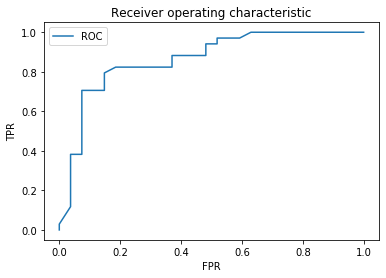

In [45]:
# Plot ROC curve using matplotlib

# Geting positive predictions only
cvs_positive = clf.predict_proba(X_test)
cvs_positive = cvs_positive[:,1]

# Parameters need for ploting ROC curve
# fpr - false positive rate
# tpr - true positiv rate

fpr, tpr, thresholds = roc_curve(y_test, cvs_positive)

roc_auc_score(y_test, cvs_positive)

plt.plot(fpr, tpr, label='ROC')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title('Receiver operating characteristic')
plt.show()


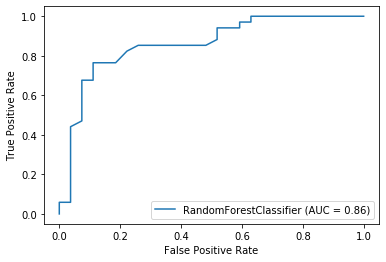

In [91]:
# Plot ROC curve using build in sklearn function
plot_roc_curve(clf, X_test, y_test);

# Confiusion Matrix

In [82]:
y_preds = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)

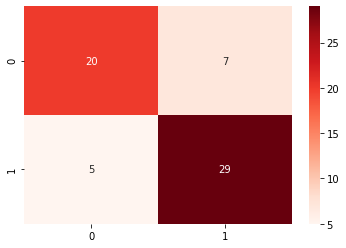

In [103]:
sns.heatmap(conf_mat, annot=True, cmap='Reds');

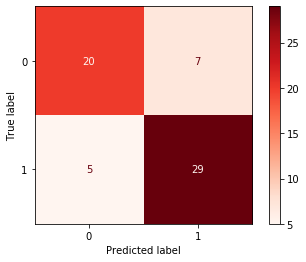

In [102]:
plot_confusion_matrix(clf, X_test, y_test, cmap='Reds');

# Tuning model
We will be using our evaluation function

In [46]:
def evaluate_preds(y_true, y_pred):
    """
    Evaluate our model predictions.
    Return dictionary of evaluations
    """
    acc_s = round(accuracy_score(y_true, y_pred)*100, 2)
    pre_s = round(precision_score(y_true, y_pred)*100, 2)
    r2_s = round(r2_score(y_true, y_pred)*100, 2)
    f1_s = round(f1_score(y_true, y_pred)*100, 2)
    
    print(f"Accuracy score: {acc_s}%")
    print(f"Precision score: {pre_s}%")
    print(f"R2 score: {r2_s}%")
    print(f"F1 score: {f1_s}%")
    
    evaluate_dict = {'acc_score': acc_s,
                     'pre_score': pre_s,
                     'r2_score': r2_s,
                     'f1_score': f1_s}
    return evaluate_dict

In [47]:
# Make train, valid and test data. 0.7 - 0.15 - 0.15
# we will use 2 times of train_test_split function
# Train 0.7, 0.3, then we will split 0.3 by half

X_train, X_, y_train, y_ = train_test_split(trans_trans, y, test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_, y_, test_size=0.5)

clf = RandomForestClassifier()


clf.fit(X_train, y_train)

#len(X_train), len(X_valid), len(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
# Predict
y_valid_preds = clf.predict(X_valid)
# Evaluate
base_preds = evaluate_preds(y_valid, y_valid_preds);

Accuracy score: 77.78%
Precision score: 83.87%
R2 score: -3.69%
F1 score: 83.87%


Accuracy score: 82.22%
Precision score: 88.0%
R2 score: 25.93%
F1 score: 84.62%


## Tuning model with RandomizeSearchCV

In [49]:
grid = {
    'n_estimators': [10, 100, 200, 500, 1000, 1200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2 , 4]
}

In [82]:

X_train, X_test, y_train, y_test = train_test_split(trans_trans, y, test_size=0.2)

#n_jobs None means 1, -1 means using all processors
clf = RandomForestClassifier(n_jobs=-1)

# cv=5 cross validation, we don't have to use train,valid, test split
# n_iter Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.
# n_iter=5 5 models, with random hyperparameters

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20,
                            cv=5,
                            verbose=2,
                            n_jobs=-1)

rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


In [83]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10}

In [88]:
rs_y_preds = rs_clf.predict(X_test)
rs_preds = evaluate_preds(y_test, rs_y_preds)

Accuracy score: 75.41%
Precision score: 71.43%
R2 score: 1.61%
F1 score: 76.92%


In [67]:
pickle.dump(rs_clf, open('random_forest_RS_clf_v2.pkl', 'wb'))

## GridSearchCV


In [73]:
grid_2 = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6]
}


X_train, X_test, y_train, y_test = train_test_split(trans_trans, y, test_size=0.2)

#n_jobs None means 1, -1 means using all processors
clf = RandomForestClassifier(n_jobs=-1)

# cv=5 cross validation, we don't have to use train,valid, test split

gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2,
                            n_jobs=-1)

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.6min finished


In [74]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [89]:
gs_y_preds = gs_clf.predict(X_test)
gs_preds = evaluate_preds(y_test, gs_y_preds)

Accuracy score: 86.89%
Precision score: 86.67%
R2 score: 47.53%
F1 score: 86.67%


In [90]:
rs_y_preds = rs_clf.predict(X_test)
rs_preds = evaluate_preds(y_test, rs_y_preds)

Accuracy score: 75.41%
Precision score: 71.43%
R2 score: 1.61%
F1 score: 76.92%


In [91]:
pickle.dump(gs_clf, open('random_forest_GS_clf_v2.pkl', 'wb'))

In [92]:
compare_df = pd.DataFrame({
    'baseline': base_preds,
    'rs_preds': rs_preds,
    'gs_preds': gs_preds
})

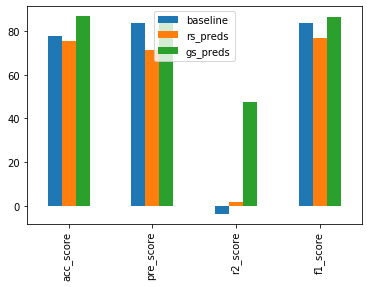

In [93]:
compare_df.plot.bar()

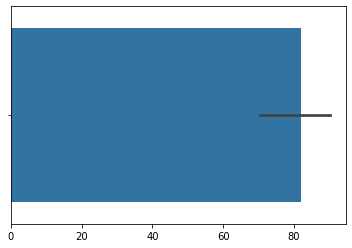

In [162]:
sns.barplot(compare_df)